# Face Detection 

In [ ]:
# !pip install mtcnn
# !pip install keras_vggface

In [1]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN #multi task convoluted neural network

Using TensorFlow backend.


In [2]:
from matplotlib.patches import Rectangle

In [3]:
from numpy import asarray
from PIL import Image 
# PIL can be pretty buggy and bothersome in installation
# dont worry too much if it fails , we use it for face extraction , there can be otherways

In [4]:
image_path=r'/Users/lalitsachan/Dropbox/DLV2/7.2 AI Application - Face Detection and Recognition/greta-thunberg-un-speech.jpg'
image=plt.imread(image_path)

In [5]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [1557, 427, 336, 448], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (1599, 601), 'right_eye': (1726, 623), 'nose': (1617, 710), 'mouth_left': (1604, 770), 'mouth_right': (1713, 786)}}
{'box': [492, 187, 377, 448], 'confidence': 0.9996956586837769, 'keypoints': {'left_eye': (587, 399), 'right_eye': (735, 339), 'nose': (687, 463), 'mouth_left': (662, 554), 'mouth_right': (785, 502)}}
{'box': [1444, 980, 58, 74], 'confidence': 0.9575718641281128, 'keypoints': {'left_eye': (1455, 1007), 'right_eye': (1482, 1005), 'nose': (1465, 1027), 'mouth_left': (1460, 1043), 'mouth_right': (1480, 1041)}}
{'box': [918, 473, 44, 57], 'confidence': 0.7797425389289856, 'keypoints': {'left_eye': (923, 494), 'right_eye': (939, 493), 'nose': (923, 508), 'mouth_left': (925, 518), 'mouth_right': (939, 518)}}


In [6]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

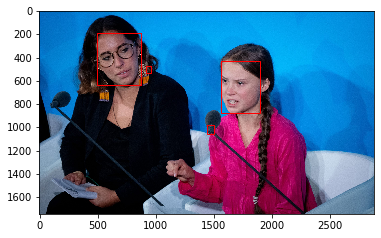

In [7]:
highlight_faces(image_path,faces)

In [8]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image(image_path)

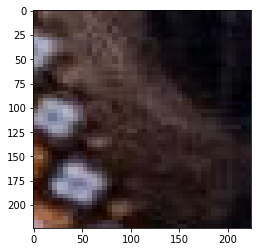

In [12]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[3])
plt.show()

# Face Recognition

In [ ]:
# you can use data base from here : http://vision.ucsd.edu/content/yale-face-database 
# popularly known as yale faces

In [ ]:
# tons of interesting datasets here : http://homepages.inf.ed.ac.uk/rbf/CVonline/Imagedbase.htm#face

In [13]:
faces_path=r'/Users/lalitsachan/Dropbox/DLV2/7.2 AI Application - Face Detection and Recognition/face_recog_data/train/'

In [14]:
import os

In [15]:
files=os.listdir(faces_path)

In [16]:
files

['yedyurappa.jpg',
 'yadavs.jpg',
 'YS-Jagan-Mohan-Reddy.jpg',
 'arvind-kejriwal-sushma-swaraj.jpg',
 'jaya.jpg',
 'smriti_irani.jpeg',
 'modi_rahul.jpg']

In [17]:
files=[x for x in files if x[0]!='.'] # to remove system files 

In [18]:
stored_faces=[]

In [19]:
for file in files:
    extracted_face = extract_face_from_image(faces_path+file)
    for face in extracted_face:
        stored_faces.append(face)

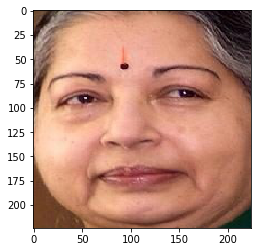

In [23]:
plt.imshow(stored_faces[6])
plt.show()

In [24]:
names=['BS yediyurappa','akhilesh yadav','dimple yadav',
       'jaganmohan reddy','arvind kejriwal','sushma swaraj',
      'jayalalitha','smriti irani','rahul gandhi','narendra modi']

In [25]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [26]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)


stored_faces_embeddings = get_model_scores(stored_faces)

In [27]:
stored_faces_embeddings.shape

(10, 2048)

In [28]:
stored_faces_embeddings_dict=dict(zip(names,stored_faces_embeddings))

In [29]:
def get_match(face_score):
    
    no_match=True
    
    for i,j in stored_faces_embeddings_dict.items():
        if cosine(face_score,j)<0.4:
            print(i)
            no_match=False
    if no_match:
        print('No Match')
    

In [ ]:
## lets match 

In [30]:
test_file=r'/Users/lalitsachan/Dropbox/DLV2/7.2 AI Application - Face Detection and Recognition/face_recog_data/test/test_pol2.jpg'

In [31]:
image=plt.imread(test_file)

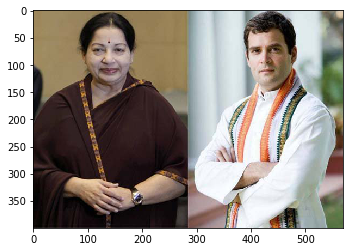

In [32]:
plt.imshow(image)

In [33]:
faces_in_image=extract_face_from_image(test_file)

In [34]:
face_scores=get_model_scores(faces_in_image)

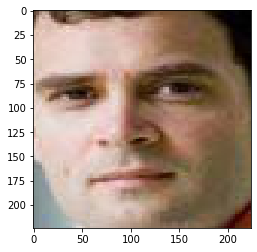

In [37]:
plt.imshow(faces_in_image[1])
plt.show()

In [38]:
get_match(face_scores[1])

rahul gandhi


In [39]:
test_file=r'/Users/lalitsachan/Dropbox/DLV2/7.2 AI Application - Face Detection and Recognition/face_recog_data/test/test_pol1.jpg'

In [40]:
image=plt.imread(test_file)

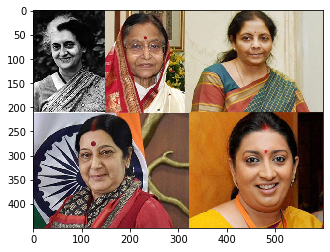

In [41]:
plt.imshow(image)

In [42]:
faces_in_image=extract_face_from_image(test_file)

In [43]:
face_scores=get_model_scores(faces_in_image)

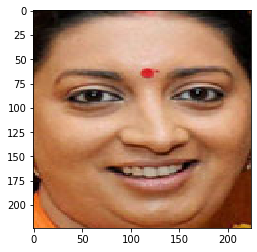

In [52]:
plt.imshow(faces_in_image[4])
plt.show()

In [53]:
get_match(face_scores[4])

smriti irani
